In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn.impute import SimpleImputer
from pandas_profiling import ProfileReport

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
%matplotlib inline

stud = pd.read_csv('stud_math.csv')

In [2]:
display(stud.head())
stud.info()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0  at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0  at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0  at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0   health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0    other    other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother         2.0        2.0       0.0       yes     no   no   
1  course   father         1.0        2.0       0.0        no    yes   no   
2   other   mother         1.0        2.0       3.0       yes     no  NaN   
3    home   mother         1.0        3.0       0.0        no    yes  yes   
4    home   father         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      NaN       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes      NaN     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# ***Предобработка***

In [3]:
# Замена пропусков на наиболее частое значение
def most_frequent_imp(df, columns):
    for col in columns:
        imputer = SimpleImputer(missing_values=np.nan,
                                strategy='most_frequent')
        df[col] = imputer.fit_transform(df[col].values.reshape(-1, 1))[:, 0]


# Замена пропусков на среднее значение
def mean_imp(df, columns):
    for col in columns:
        imputer = SimpleImputer(missing_values=np.nan,
                                strategy='mean')
        df[col] = imputer.fit_transform(df[col].values.reshape(-1, 1))[:, 0]
        quantile_sel


# Построение бокса и вывод информации для переменной
def box_info(x):
    sns.boxplot(data=stud[x])
    print(stud[x].describe())


# Замена выбросов
def quantile_sel(x):
    q_1 = stud[x].quantile(0.25)
    q_3 = stud[x].quantile(0.75)
    iqr = stud[x].quantile(0.75) - stud[x].quantile(0.25)

    stud.loc[(stud[x] > (q_3 + 1.5*iqr)) |
             (stud[x] < (q_1 - 1.5*iqr)), x] = stud[x].median()


# Построение боксов для score
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(4, 8))
    sns.boxplot(x=column, y='score', data=stud, ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# Поиск статистически значимых переменных
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# ***Удаление дубликатов***

In [4]:
stud.shape

(395, 30)

In [5]:
stud = stud.drop_duplicates()
stud.shape

(395, 30)

***Дубликатов не выявленно***
******

# ***Обработка пропусков***

In [6]:
# Проверим насколько заполнены столбцы
stud.isnull().mean() * 100

school                  0.000000
sex                     0.000000
age                     0.000000
address                 4.303797
famsize                 6.835443
Pstatus                11.392405
Medu                    0.759494
Fedu                    6.075949
Mjob                    4.810127
Fjob                    9.113924
reason                  4.303797
guardian                7.848101
traveltime              7.088608
studytime               1.772152
failures                5.569620
schoolsup               2.278481
famsup                  9.873418
paid                   10.126582
activities              3.544304
nursery                 4.050633
studytime, granular     1.772152
higher                  5.063291
internet                8.607595
romantic                7.848101
famrel                  6.835443
freetime                2.784810
goout                   2.025316
health                  3.797468
absences                3.037975
score                   1.518987
dtype: flo

***Процент пропусков в переменных не высок***

In [7]:
# Находим все уникальные значения в категориальных переменных
list_obj_col = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
column_values = stud[list_obj_col].values.ravel()
unique_values = pd.unique(column_values)
print(unique_values)

['GP' 'F' 'U' nan 'A' 'at_home' 'teacher' 'course' 'mother' 'yes' 'no'
 'GT3' 'other' 'father' 'LE3' 'T' 'health' 'home' 'M' 'services'
 'reputation' 'R' 'MS']


***Видим что пропуски обозначены как nan***

In [8]:
# Заменяем все nan в номинативных переменных на наиболее частое знаечение
most_frequent_imp(stud, list_obj_col)

In [9]:
# Заменяем все nan в числовых переменных на среднее
list_num_col = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime, granular', 'famrel', 'freetime',
                'goout', 'health', 'absences', 'score']
mean_imp(stud, list_num_col)

In [10]:
display(stud.head())
stud.info()

school sex   age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
0     GP   F  18.0       U     GT3       A   4.0   4.0  at_home  teacher   
1     GP   F  17.0       U     GT3       T   1.0   1.0  at_home    other   
2     GP   F  15.0       U     LE3       T   1.0   1.0  at_home    other   
3     GP   F  15.0       U     GT3       T   4.0   2.0   health    other   
4     GP   F  16.0       U     GT3       T   3.0   3.0    other    other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother         2.0        2.0       0.0       yes     no   no   
1  course   father         1.0        2.0       0.0        no    yes   no   
2   other   mother         1.0        2.0       3.0       yes     no   no   
3    home   mother         1.0        3.0       0.0        no    yes  yes   
4    home   father         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      yes       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes       no     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    float64
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   Pstatus              395 non-null    object 
 6   Medu                 395 non-null    float64
 7   Fedu                 395 non-null    float64
 8   Mjob                 395 non-null    object 
 9   Fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           395 non-null    float64
 13  studytime            395 non-null    float64
 14  failures             395 non-null    float64
 15  schoolsup            395 non-null    obj

******

# ***Удаление выбросов***

<AxesSubplot:>

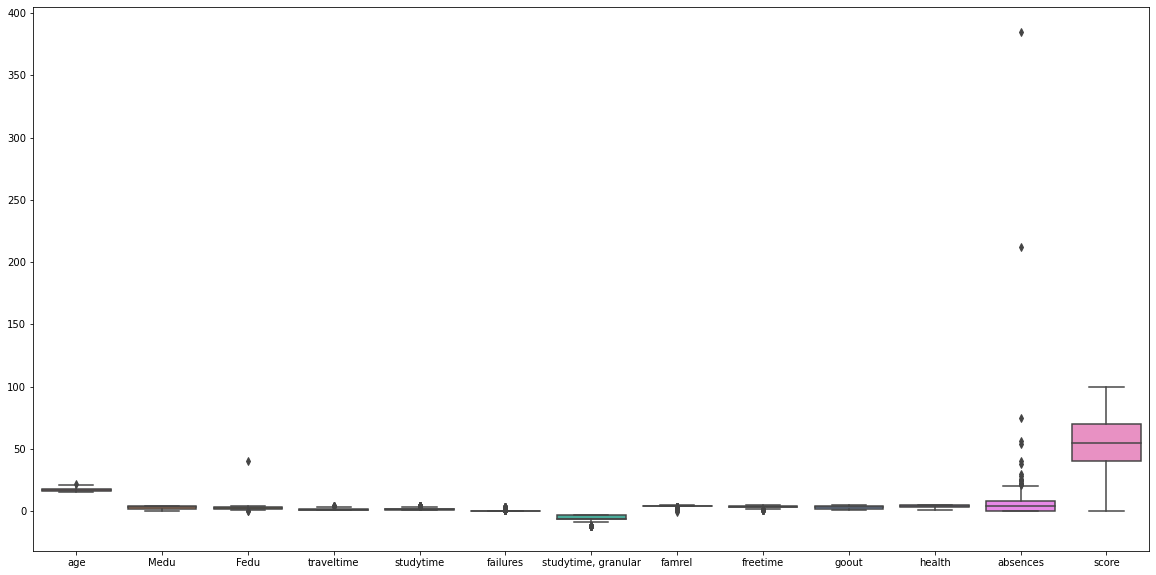

In [11]:
fig, fig = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(data=stud)
fig

***Видим выбросы в столбцах 'Fedu' , 'famreal' и 'absences'***


count    395.000000
mean       2.614555
std        2.159786
min        0.000000
25%        2.000000
50%        2.614555
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64


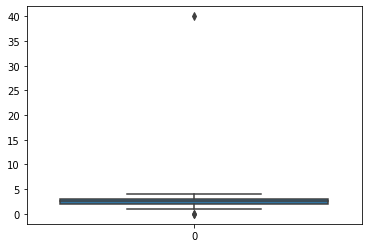

In [12]:
box_info('Fedu')

In [13]:
# Есть основание полагать что значение равное 40 является опечаткой, заменим его на 4.0
stud.Fedu[11] = 4.0

<ipython-input-13-f516ab58f839>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.Fedu[11] = 4.0


count    395.000000
mean       7.279373
std       23.105096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


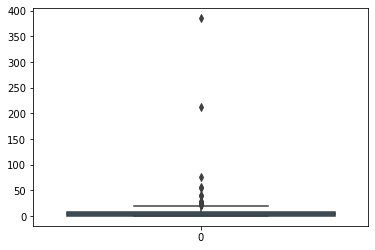

In [14]:
box_info('absences')

In [15]:
# Заменим выбросы значением медианы
quantile_sel('absences')

count    395.000000
mean       3.937500
std        0.894941
min       -1.000000
25%        3.937500
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64


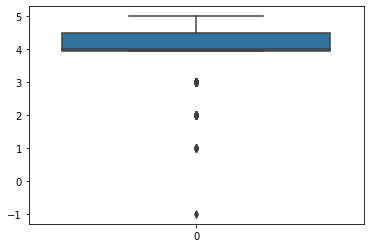

In [16]:
box_info('famrel')

In [17]:
# Есть основание полагать что значение равное -1 является опечаткой, заменим его на 1
stud.famrel[25] = 1

<ipython-input-17-7042b3a885dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.famrel[25] = 1


***

# ***Одномерный анализ***

In [18]:
profile = ProfileReport(stud)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

***В распределении столбца score видим большое количествов нулевых значений не типичных для общего распределения.     
Они не являются выбросами, но вероятно нулями были заполнены отсутствующие данные.  
Не будем их заменять так как слишком много возможных значений.***
******

# ***Корреляционный анализ***

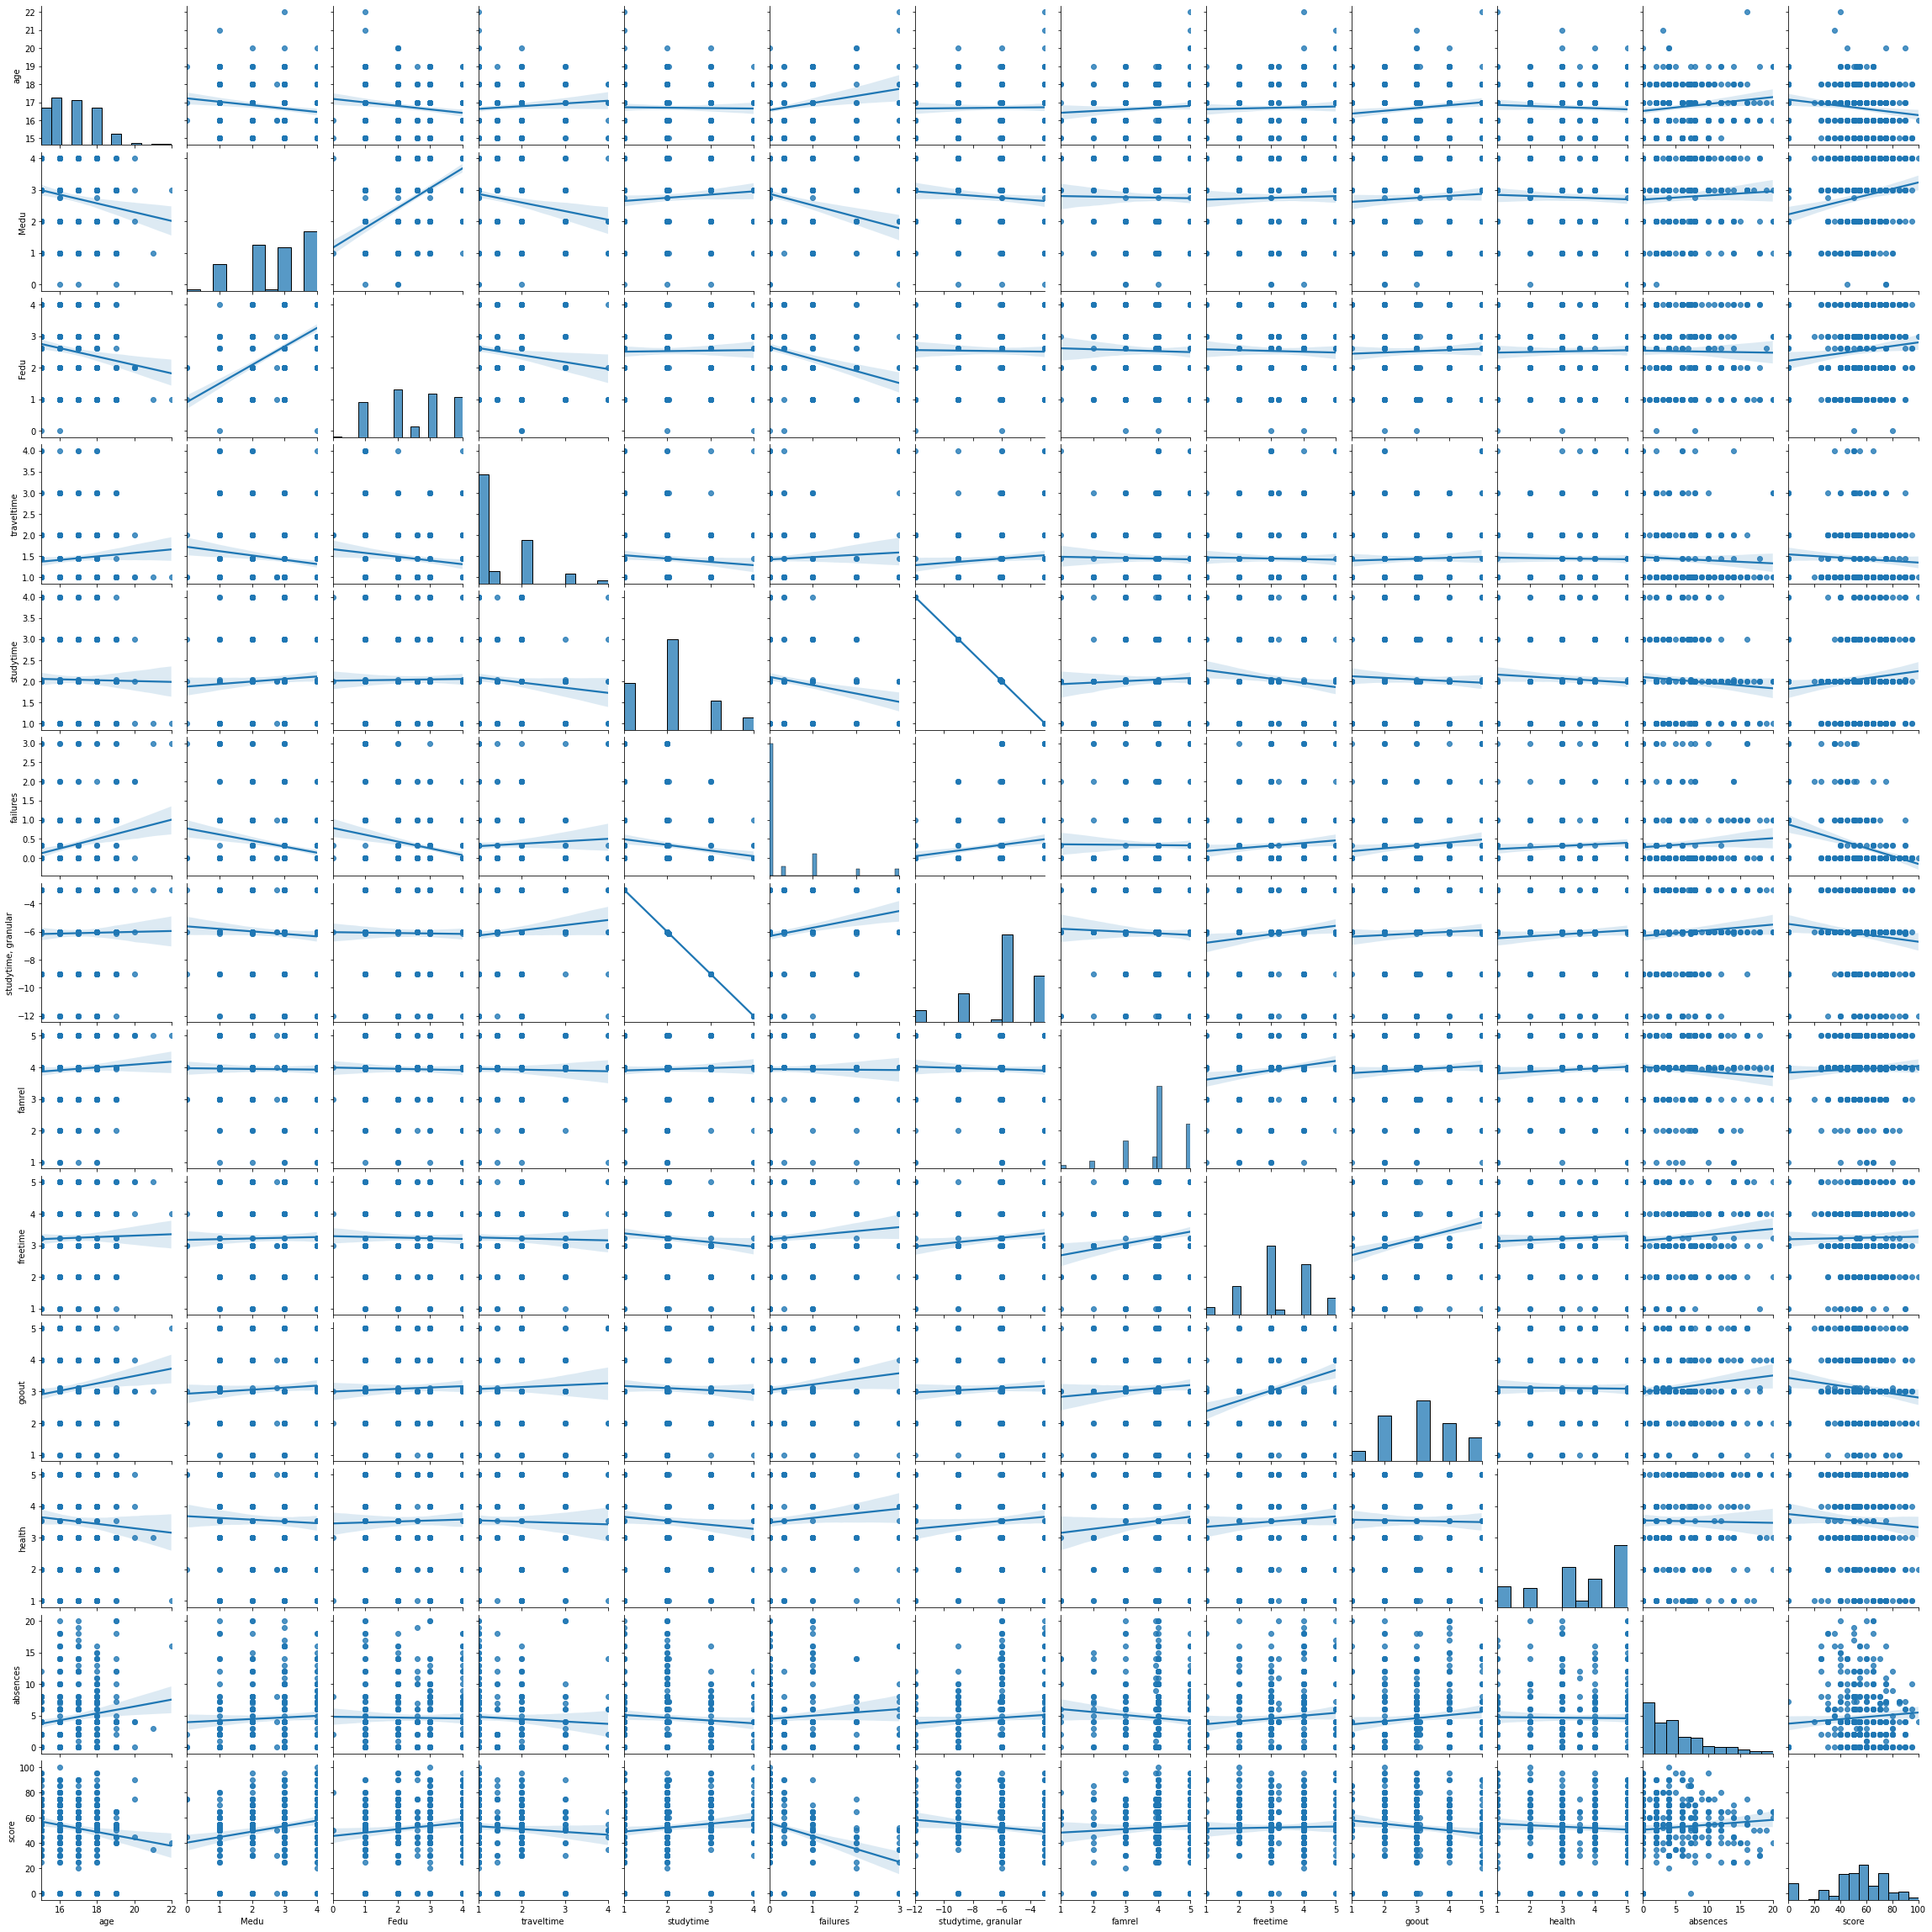

In [19]:
sns.pairplot(stud, kind='reg')

In [20]:
stud.corr()

age      Medu      Fedu  traveltime  studytime  \
age                  1.000000 -0.161367 -0.160101    0.078785  -0.015436   
Medu                -0.161367  1.000000  0.606064   -0.166680   0.077814   
Fedu                -0.160101  0.606064  1.000000   -0.140346   0.013202   
traveltime           0.078785 -0.166680 -0.140346    1.000000  -0.098204   
studytime           -0.015436  0.077814  0.013202   -0.098204   1.000000   
failures             0.220724 -0.239548 -0.259474    0.059377  -0.171435   
studytime, granular  0.015436 -0.077814 -0.013202    0.098204  -1.000000   
famrel               0.065088 -0.013922 -0.025072   -0.019752   0.038056   
freetime             0.028505  0.024765 -0.023661   -0.020643  -0.118494   
goout                0.134354  0.063042  0.040861    0.036466  -0.050467   
health              -0.065089 -0.043864  0.023874   -0.020328  -0.077504   
absences             0.144026  0.057195 -0.014901   -0.052005  -0.077056   
score               -0.153279  0.209408  0.124322   -0.066128   0.114641   

                     failures  studytime, granular    famrel  freetime  \
age                  0.220724             0.015436  0.065088  0.028505   
Medu                -0.239548            -0.077814 -0.013922  0.024765   
Fedu                -0.259474            -0.013202 -0.025072 -0.023661   
traveltime           0.059377             0.098204 -0.019752 -0.020643   
studytime           -0.171435            -1.000000  0.038056 -0.118494   
failures             1.000000             0.171435 -0.008652  0.094350   
studytime, granular  0.171435             1.000000 -0.038056  0.118494   
famrel              -0.008652            -0.038056  1.000000  0.166753   
freetime             0.094350             0.118494  0.166753  1.000000   
goout                0.115922             0.050467  0.073492  0.289547   
health               0.076845             0.077504  0.081546  0.059354   
absences             0.078060             0.077056 -0.085643  0.091017   
score               -0.324682            -0.114641  0.052919  0.018700   

                        goout    health  absences     score  
age                  0.134354 -0.065089  0.144026 -0.153279  
Medu                 0.063042 -0.043864  0.057195  0.209408  
Fedu                 0.040861  0.023874 -0.014901  0.124322  
traveltime           0.036466 -0.020328 -0.052005 -0.066128  
studytime           -0.050467 -0.077504 -0.077056  0.114641  
failures             0.115922  0.076845  0.078060 -0.324682  
studytime, granular  0.050467  0.077504  0.077056 -0.114641  
famrel               0.073492  0.081546 -0.085643  0.052919  
freetime             0.289547  0.059354  0.091017  0.018700  
goout                1.000000 -0.015055  0.113417 -0.127542  
health              -0.015055  1.000000 -0.013351 -0.068938  
absences             0.113417 -0.013351  1.000000  0.082973  
score               -0.127542 -0.068938  0.082973  1.000000

***По значениям корреляции видим:***  
1. Большие значения корреляции между переменными "Medu", "Fedu", "studytime" и "studytime, granular". Для дальнейшего построения модели переменные "studytime, granular" и "Fedu" можно исключить.  
2. Положительная корреляция переменной "score" говорит о том что:  
  * Высокий уровень образования родителей положительно сказывается на оценках студентов, при этом наибольшее значение имеет уровень оброзования матери.  
  * Также положительно сказывается на учебе отсутствие пропусков занятий и учеба помимо школы.  
3. Отрицательная корреляция переменной "score" говорит о том что:  
  * Наиболее негативно на итоговую оценку влияют неудачи вне учебы.  
  * Также весьма негативно сказывается время препровождение с друзьями.
*****

# ***Анализ номинативных переменных***

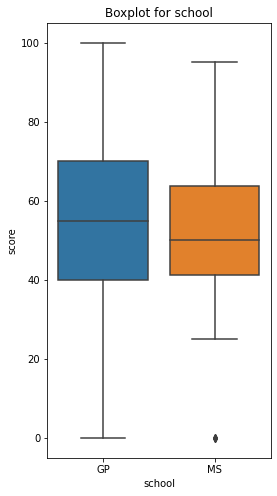

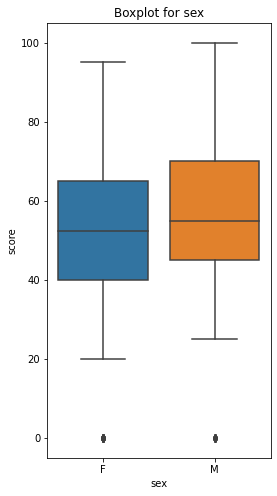

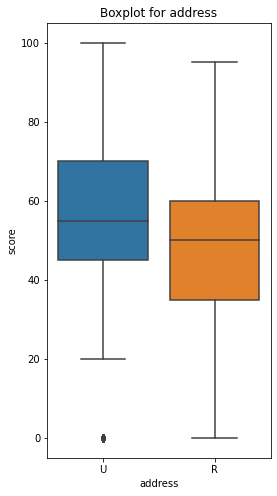

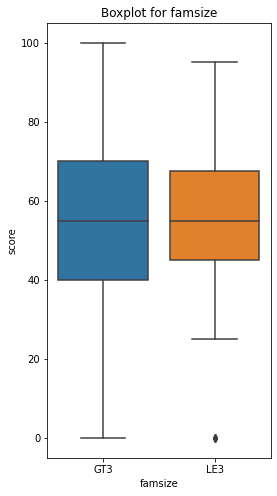

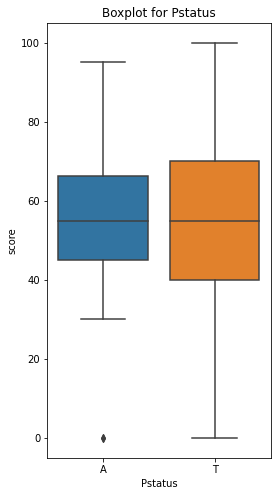

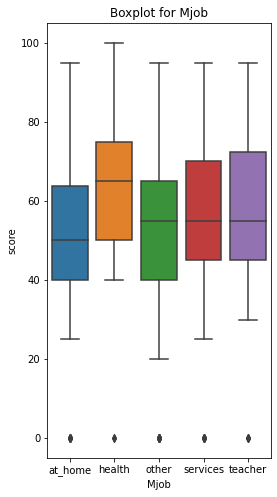

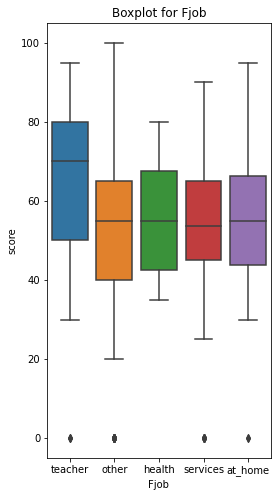

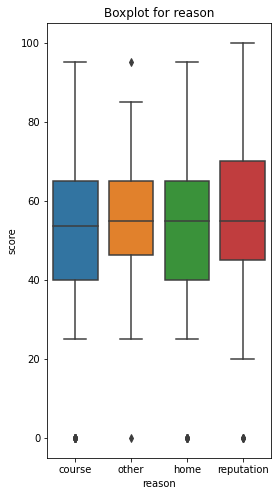

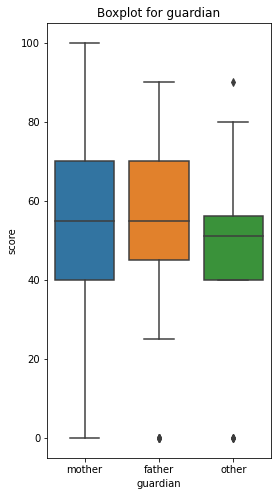

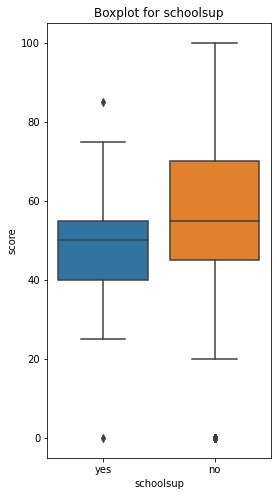

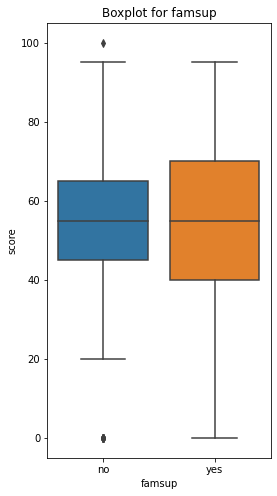

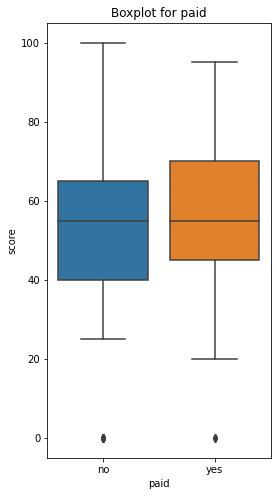

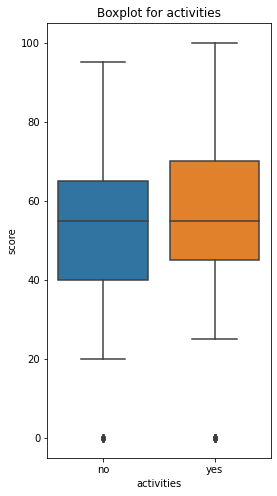

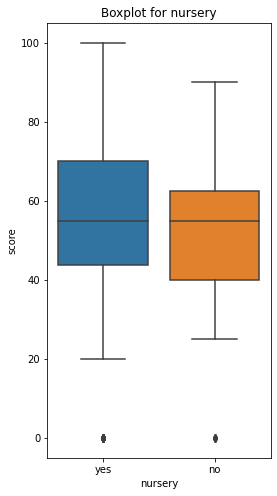

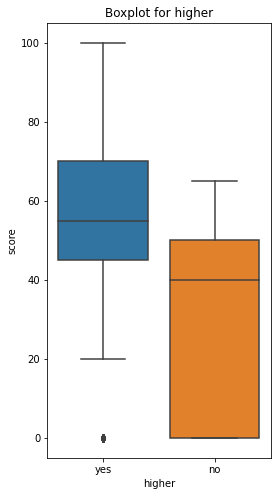

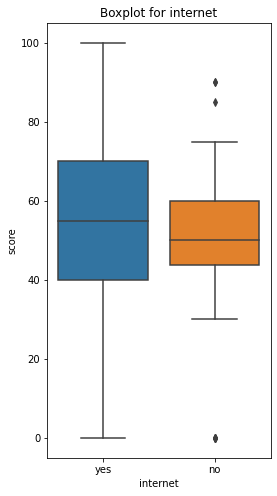

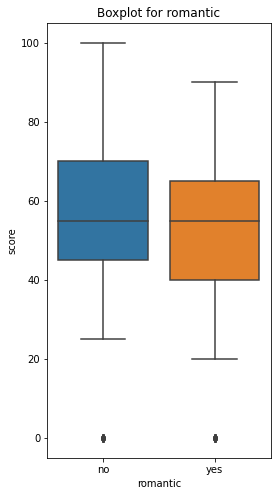

In [21]:
for col in list_obj_col:
    get_boxplot(col)

In [22]:
for col in list_obj_col:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


***Выявили 4 статистически различные переменные.  
Оставим их для дальнейшего построения модели.***
*****

# ***Итог***

***По результатам проведенного анализа можно сделать следующие выводы:***  
1. Данные достаточно полные с незначительным количеством пустых значений, но в переменной 'score' выявленно большое количество нулевых значений.
2. Данные чистые, большое количество выбросов обнаруженно только в переменной 'absences'.
3. Наибольная корреляция для значений итоговой оценки выяленна с уровнем образования родителей, а наименьшая с неудачами вне учены. 
4. Для дальнейшего построения были отобраны следующие переменные:  
 * 'age', 'Medu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences',  
 * 'address', 'Mjob', 'higher', 'romantic'.

In [23]:
stud_for_model = stud.loc[:, ['age', 'Medu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
                              'goout', 'health', 'absences',  'address', 'Mjob', 'higher', 'romantic']]
stud_for_model.head()

age  Medu  traveltime  studytime  failures  famrel  freetime  goout  \
0  18.0   4.0         2.0        2.0       0.0     4.0       3.0    4.0   
1  17.0   1.0         1.0        2.0       0.0     5.0       3.0    3.0   
2  15.0   1.0         1.0        2.0       3.0     4.0       3.0    2.0   
3  15.0   4.0         1.0        3.0       0.0     3.0       2.0    2.0   
4  16.0   3.0         1.0        2.0       0.0     4.0       3.0    2.0   

   health  absences address     Mjob higher romantic  
0     3.0       6.0       U  at_home    yes       no  
1     3.0       4.0       U  at_home    yes       no  
2     3.0      10.0       U  at_home    yes       no  
3     5.0       2.0       U   health    yes      yes  
4     5.0       4.0       U    other    yes       no